In [1]:
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv('ThisOne.csv')
df.head()

,problem_set,problem_set_name,User ID,condition,ExperiencedCondition,Saw Video,Class ID,Class Section ID,Class Grade,Teacher ID,...,Z-Scored Mastery Speed,Prior Homework Assigned,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,log(count),problem_count
0,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,172777,E,False,NaN,31189,NaN,"""8""",42999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.602060,4
1,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,175658,E,True,NaN,30642,54689.0,"""7""",68444,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,22
2,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,175669,E,True,NaN,29270,51191.0,"""6""",59965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.041393,11
3,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,176151,E,True,NaN,29270,51191.0,"""6""",59965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000,10
4,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,176165,E,True,NaN,29270,51191.0,"""6""",59965,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6


In [3]:
video_ps = [250476, 256017, 256027, 259379, 263015, 263052, 263109, 263115, 293151]
print "The number of experiments with video: {}".format(len(video_ps))

The number of experiments with video: 9


In [4]:
print 'The number of rows in this dataset {}'.format(len(df))

The number of rows in this dataset 15121


In [5]:
student_count = len(df['User ID'].unique())
print 'Total number of students in this dataset {}'.format(student_count)

Total number of students in this dataset 8297


In [6]:
ps_list = df['problem_set'].unique().tolist()
print "The number of problem sets {}".format(len(ps_list))

The number of problem sets 22


In [8]:
# determine the condition
for ps in ps_list:
    sub_df = df[df['problem_set'] == ps]
    if ps in video_ps:
        control = sub_df[(sub_df['Saw Video'] == 1) & \
                           (sub_df['ExperiencedCondition'] == True)&(sub_df['condition']=='C')]
        exp = sub_df[(sub_df['Saw Video'] == 1) & \
                           (sub_df['ExperiencedCondition'] == True)&(sub_df['condition']=='E')]
    else:
        control = sub_df[(sub_df['ExperiencedCondition'] == True) & (sub_df['condition']=='C')]
        exp = sub_df[(sub_df['ExperiencedCondition'] == True) & (sub_df['condition']=='E')]
    print ps
    print '# in control {} \t # in exp {}'.format(len(control), len(exp))
    print 'CR in control {} \t CR in exp {}'.format(control['complete'].sum()*1.0/len(control), exp['complete'].sum()*1.0/len(exp))
    print stats.ttest_ind(control['complete'], exp['complete'])
    print '\n'

226210
# in control 403 	 # in exp 372
CR in control 0.640198511166 	 CR in exp 0.559139784946
Ttest_indResult(statistic=2.3074477139128384, pvalue=0.021293212167334933)


237447
# in control 330 	 # in exp 365
CR in control 0.984848484848 	 CR in exp 0.956164383562
Ttest_indResult(statistic=2.210535236283758, pvalue=0.027393951521682374)


241501
# in control 138 	 # in exp 135
CR in control 0.891304347826 	 CR in exp 0.866666666667
Ttest_indResult(statistic=0.622498904359692, pvalue=0.5341372929316923)


241622
# in control 338 	 # in exp 289
CR in control 0.878698224852 	 CR in exp 0.837370242215
Ttest_indResult(statistic=1.4853230656027976, pvalue=0.13796246009390795)


243393
# in control 943 	 # in exp 921
CR in control 0.699893955461 	 CR in exp 0.678610206298
Ttest_indResult(statistic=0.9925391413643302, pvalue=0.3210635573224583)


246482
# in control 224 	 # in exp 233
CR in control 0.732142857143 	 CR in exp 0.742489270386
Ttest_indResult(statistic=-0.2507390161607181, pvalu

In [14]:
df['problem_set'].value_counts()

303899    1917
243393    1864
293151    1330
226210    1204
263115     754
263015     704
237447     695
241622     627
255116     545
246647     540
263052     523
246627     515
259379     497
246482     457
377658     429
263109     428
377938     426
256017     412
250476     402
241501     381
256027     335
263057     136
Name: problem_set, dtype: int64

In [6]:
df.columns

Index([u'problem_set', u'problem_set_name', u'User ID', u'condition',
       u'ExperiencedCondition', u'Saw Video', u'Class ID', u'Class Section ID',
       u'Class Grade', u'Teacher ID', u'Guessed Gender', u'Birthyear',
       u'school_id', u'District ID', u'State ID', u'Prior Problem Count',
       u'Prior Correct Count', u'Prior Percent Correct',
       u'Prior Assignments Assigned', u'Prior Assignment Count',
       u'Prior Completion Count', u'Prior Percent Completion',
       u'Prior Class Percent Completion', u'Z-Scored Mastery Speed',
       u'Prior Homework Assigned', u'Prior Homework Count',
       u'Prior Homework Completion Count',
       u'Prior Homework Percent Completion',
       u'Prior Class Homework Percent Completion',
       u'Z-Scored HW Mastery Speed', u'complete', u'log(count)',
       u'problem_count'],
      dtype='object')

In [6]:
cols = ['Prior Correct Count', 'Prior Completion Count', 'Prior Homework Completion Count']
cols_zscore = map(lambda x: x+' zscore', cols)
for idx, col in enumerate(cols):
    df[cols_zscore[idx]] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [7]:
features_list = ['Prior Percent Correct', 'Prior Percent Completion', 'Z-Scored Mastery Speed', 
                 'Prior Homework Percent Completion', 'Z-Scored HW Mastery Speed'] + cols + ['complete']
stu_df = df.groupby('User ID')[features_list].first()

In [23]:
ps_df = df.groupby('problem_set').mean()['complete']

In [25]:
ps_df.transpose()

problem_set
226210    0.647010
237447    0.969784
241501    0.871391
241622    0.859649
243393    0.689378
246482    0.737418
246627    0.710680
246647    0.844444
250476    0.898010
255116    0.798165
256017    0.820388
256027    0.904478
259379    0.404427
263015    0.879261
263052    0.623327
263057    0.889706
263109    0.915888
263115    0.828912
293151    0.869173
303899    0.929056
377658    0.708625
377938    0.821596
Name: complete, dtype: float64

In [16]:
stu_df['complete'].value_counts()

1    6468
0    1829
Name: complete, dtype: int64

In [8]:
dropped_stu_df = stu_df.dropna(0)
dropped_stu_df.head()

,Prior Percent Correct,Prior Percent Completion,Z-Scored Mastery Speed,Prior Homework Percent Completion,Z-Scored HW Mastery Speed,Prior Correct Count,Prior Completion Count,Prior Homework Completion Count,complete
User ID,,,,,,,,,
75064,0.725118,0.920000,0.123971,0.947368,0.114843,306.0,23.0,18.0,1
76247,0.605735,0.823529,0.258035,0.866667,0.036843,169.0,14.0,13.0,1
82250,0.715765,1.000000,-0.402450,1.000000,-0.484626,622.0,25.0,19.0,1
83935,0.689249,1.000000,-0.150268,1.000000,-0.188084,468.0,19.0,11.0,1
85945,0.689441,1.000000,-0.032390,1.000000,-0.006224,222.0,17.0,11.0,1


In [9]:
dropped_stu_df.shape

(4323, 9)

In [10]:
features = ['Prior Percent Correct', 'Prior Percent Completion', 'Z-Scored Mastery Speed', 
                 'Prior Homework Percent Completion', 'Z-Scored HW Mastery Speed'] + cols
x = dropped_stu_df[features]
y = dropped_stu_df['complete']

In [15]:
y.value_counts()

1    3647
0     676
Name: complete, dtype: int64

In [11]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

In [12]:
stu_proj = TSNE(random_state=RS).fit_transform(x)

In [13]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                   c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

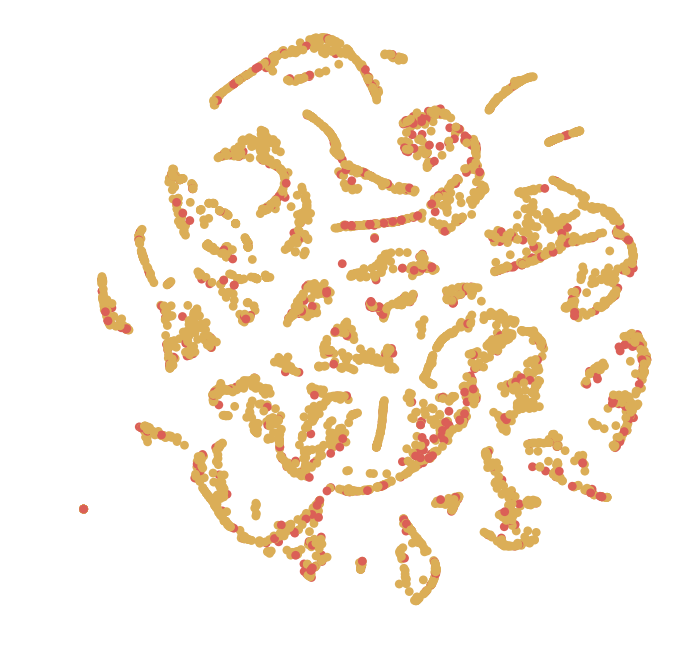

In [14]:
scatter(stu_proj, y)
plt.savefig('students_tsne-generated.png', dpi=120)